# Analysis of Cricket Matches from ODI 2018

This dataset is about cricket matches from ODI Series 2018. It contains information regarding the participarting teams, winner, margin, match date, venue and score card.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data 
Data is being imported from excel sheet

In [2]:
matchesData = pd.read_excel("Cricket Matches1.xlsx")
matchesData.head()

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950


In [125]:
matchesData.info() # shows the datatypes of all columns in the dataframe

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 127
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Team 1      126 non-null    object        
 1   Team 2      126 non-null    object        
 2   Winner      126 non-null    object        
 3   Margin      126 non-null    string        
 4   Ground      126 non-null    object        
 5   Match Date  126 non-null    datetime64[ns]
 6   Scorecard   126 non-null    object        
 7   Wickets     121 non-null    object        
 8   Runs        121 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(6), string(1)
memory usage: 13.9+ KB


## Cleaning Data

First off we eliminate the matches that do not have any result

In [3]:
matchesData[matchesData['Winner'] == "no result"] 

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
106,Sri Lanka,England,no result,NaN,Dambulla,2018-10-10,ODI # 4052
124,New Zealand,Pakistan,no result,NaN,Dubai (DSC),2018-11-11,ODI # 4070


 As we can see that two matches donot have any results hence we can ignore these since they will not affect our results

In [4]:
#removing such rows
matchesData = matchesData.drop(matchesData[matchesData['Winner'] == "no result"].index)

Handling matches which tied as there won't be any margin parameter

In [5]:
matchesData[matchesData['Winner'] == "tied"]

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
50,Zimbabwe,Scotland,tied,NaN,Bulawayo,2018-03-12,ODI # 3996
100,Afghanistan,India,tied,NaN,Dubai (DSC),2018-09-25,ODI # 4046
113,India,West Indies,tied,NaN,Visakhapatnam,2018-10-24,ODI # 4059


In [6]:
#tied matches donot have any parameter to determine margine hence they are marked as 0
matchesData.loc[(matchesData.Winner == 'tied'),'Margin'] = '0' 
matchesData[matchesData['Winner'] == "tied"]

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard
50,Zimbabwe,Scotland,tied,0,Bulawayo,2018-03-12,ODI # 3996
100,Afghanistan,India,tied,0,Dubai (DSC),2018-09-25,ODI # 4046
113,India,West Indies,tied,0,Visakhapatnam,2018-10-24,ODI # 4059


In [7]:
# changing datatype of Margin column for better data handling
matchesData['Margin'] = matchesData['Margin'].astype('string')
matchesData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126 entries, 0 to 127
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Team 1      126 non-null    object        
 1   Team 2      126 non-null    object        
 2   Winner      126 non-null    object        
 3   Margin      126 non-null    string        
 4   Ground      126 non-null    object        
 5   Match Date  126 non-null    datetime64[ns]
 6   Scorecard   126 non-null    object        
dtypes: datetime64[ns](1), object(5), string(1)
memory usage: 7.9+ KB


In [8]:
# Utility function to split the column into two based on the mentioned param which can be runs or wickets
def split_margin():
    for index, rows in matchesData.iterrows(): 
        if rows['Margin'].find("wickets") != -1:
            matchesData.loc[index,'Wickets']= rows['Margin']
            matchesData.loc[index,'Runs']= "-1 runs"
        elif rows['Margin'].find('runs') != -1:
            matchesData.loc[index,'Wickets']= "-1 wickets"
            matchesData.loc[index,'Runs']= rows['Margin']
        
split_margin()
matchesData

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Wickets,Runs
0,New Zealand,Pakistan,New Zealand,61 runs,Wellington,2018-01-06,ODI # 3946,-1 wickets,61 runs
1,New Zealand,Pakistan,New Zealand,8 wickets,Nelson,2018-01-09,ODI # 3947,8 wickets,-1 runs
2,U.A.E.,Ireland,Ireland,4 wickets,ICCA Dubai,2018-01-11,ODI # 3948,4 wickets,-1 runs
3,New Zealand,Pakistan,New Zealand,183 runs,Dunedin,2018-01-13,ODI # 3949,-1 wickets,183 runs
4,U.A.E.,Ireland,Ireland,67 runs,ICCA Dubai,2018-01-13,ODI # 3950,-1 wickets,67 runs
...,...,...,...,...,...,...,...,...,...
122,New Zealand,Pakistan,Pakistan,6 wickets,Abu Dhabi,2018-11-09,ODI # 4068,6 wickets,-1 runs
123,Australia,South Africa,South Africa,40 runs,Hobart,2018-11-11,ODI # 4069,-1 wickets,40 runs
125,Bangladesh,West Indies,Bangladesh,5 wickets,Dhaka,2018-12-09,ODI # 4071,5 wickets,-1 runs
126,Bangladesh,West Indies,West Indies,4 wickets,Dhaka,2018-12-11,ODI # 4072,4 wickets,-1 runs


## Which country played most ODI's in 2019?

In [9]:
pd.DatetimeIndex(matchesData['Match Date']).year == 2019

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

As you can see that the dataset does not contain any matches from 2019. Hence we cannot answer the above question

## Top 3 countries that won the most ODI's

In [10]:
matchesData['Winner'].value_counts().head(3)

England       17
India         14
Bangladesh    13
Name: Winner, dtype: int64

In [50]:
winners = matchesData['Winner'].value_counts()
winners

England         17
India           14
Bangladesh      13
Afghanistan     12
South Africa     9
Ireland          8
Pakistan         8
West Indies      8
New Zealand      8
Sri Lanka        6
Scotland         5
Zimbabwe         5
U.A.E.           4
tied             3
Australia        2
Hong Kong        1
P.N.G.           1
Netherlands      1
Nepal            1
Name: Winner, dtype: int64

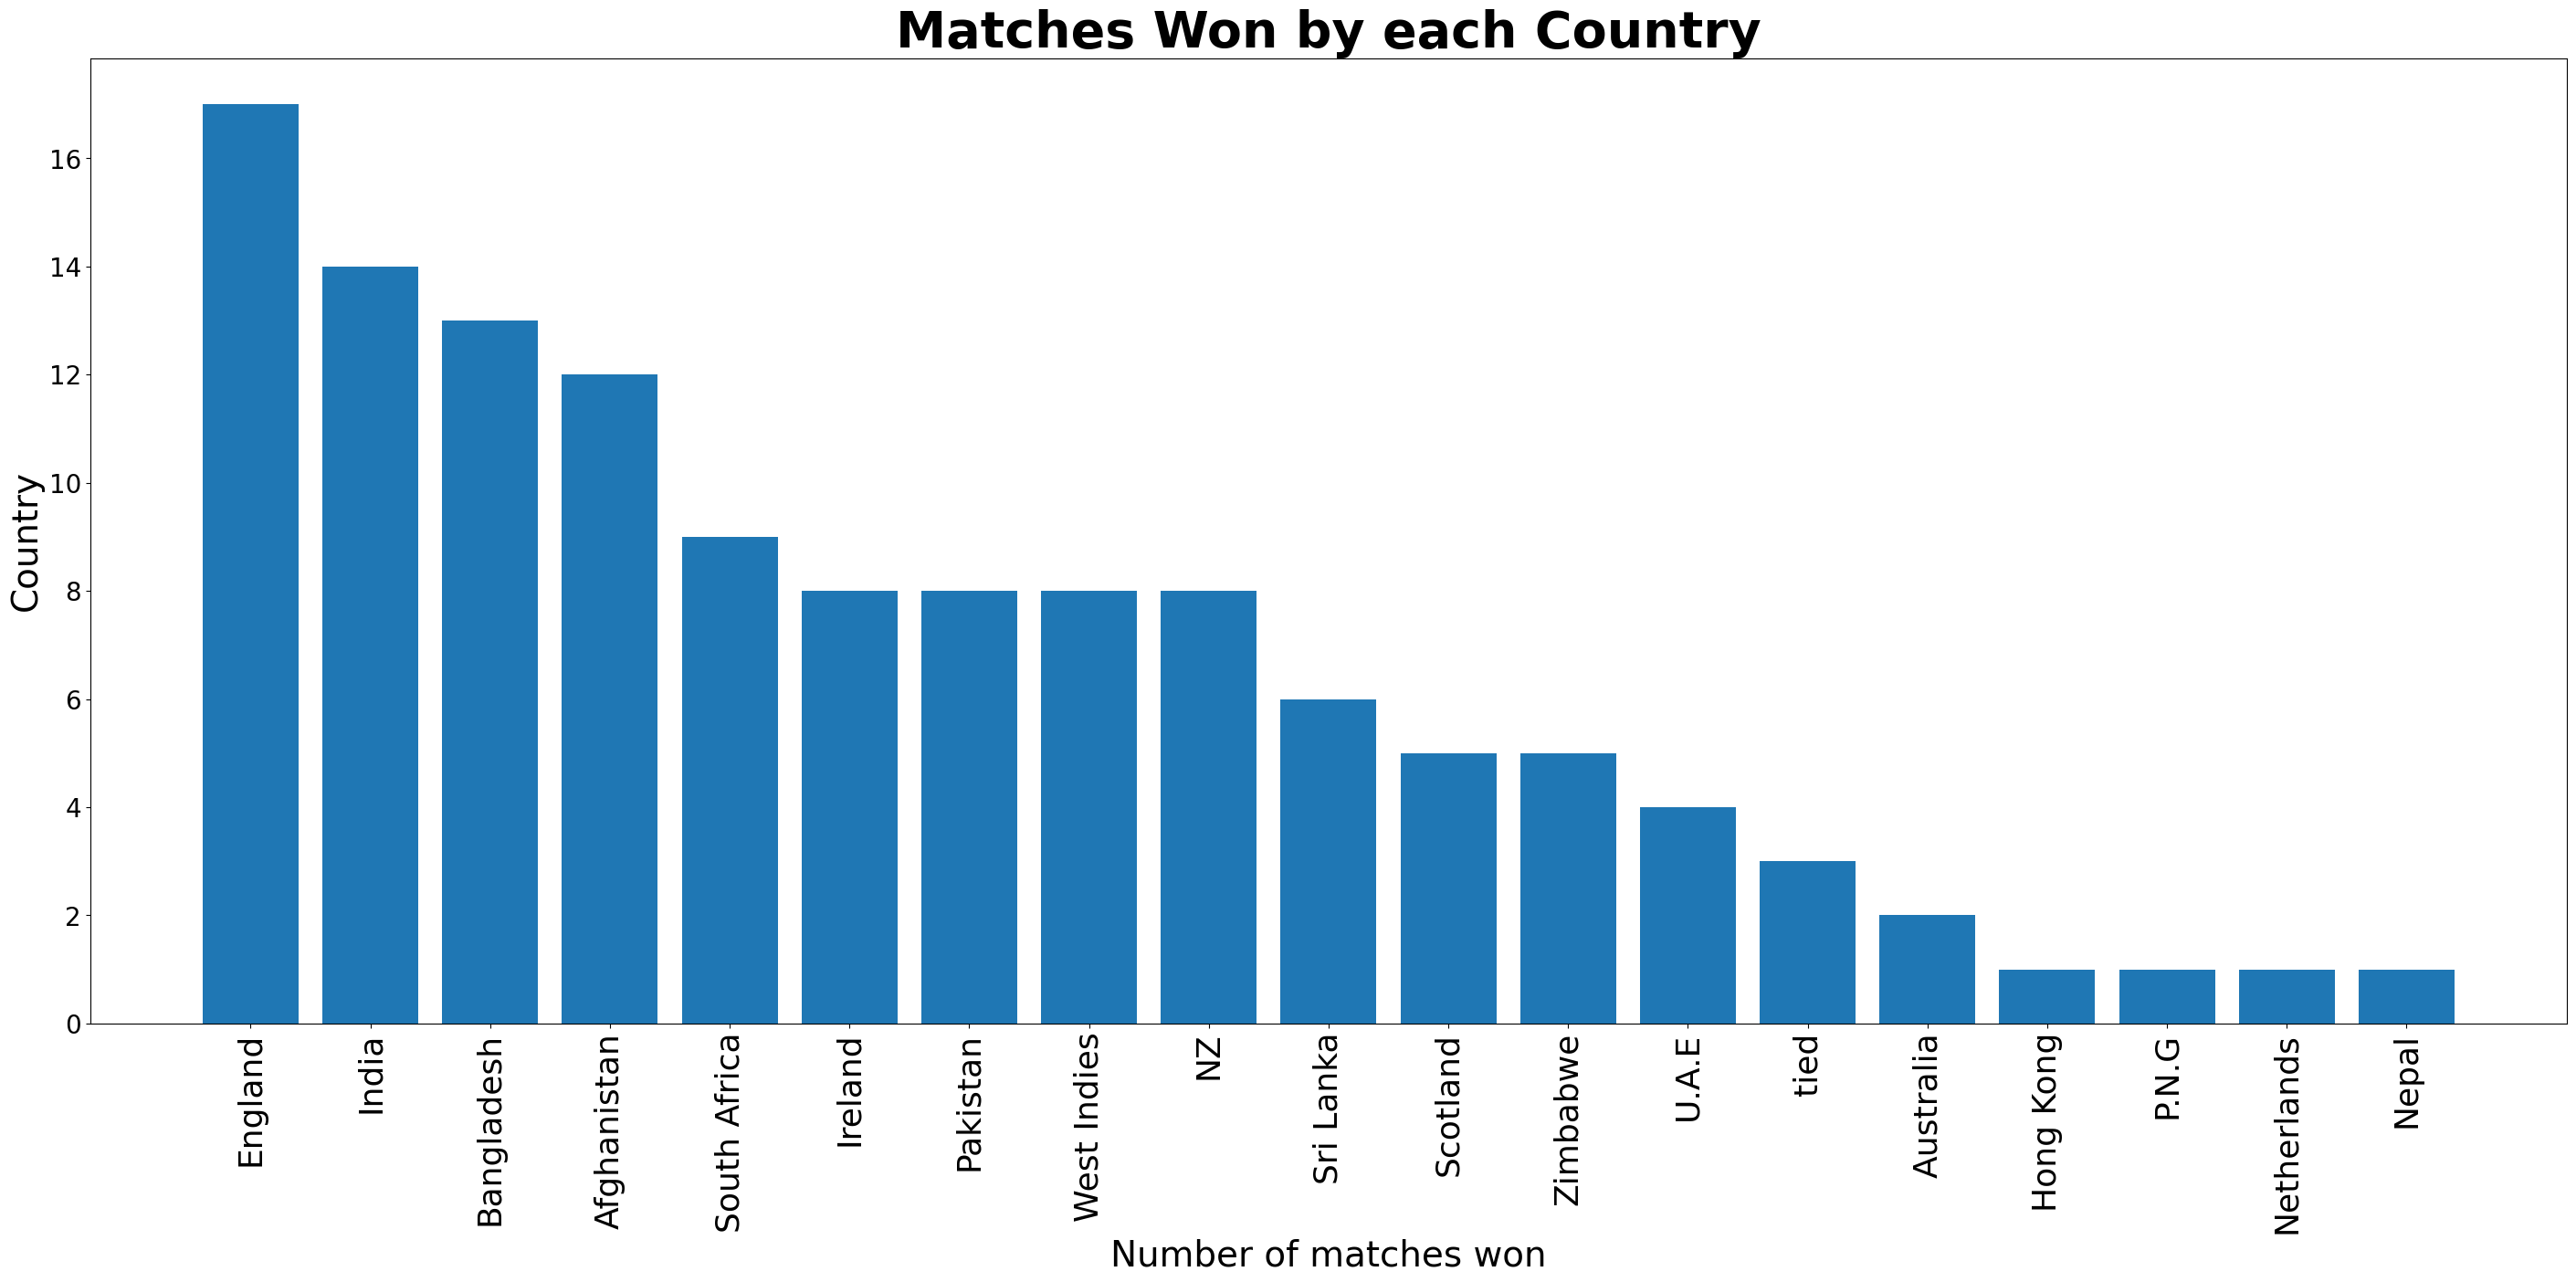

In [104]:
# plotting a bar-graph to see the pattern 
labels = ["England", "India", "Bangladesh", "Afghanistan", "South Africa", "Ireland", "Pakistan", "West Indies", "NZ", "Sri Lanka", "Scotland", "Zimbabwe", "U.A.E", "tied","Australia","Hong Kong","P.N.G","Netherlands","Nepal"]
values = winners
plt.figure(figsize = (35, 14), dpi = 100)
bars = plt.bar(labels, values)
plt.title("Matches Won by each Country", fontdict = {"fontweight": "bold", "fontsize": "40"})
plt.xlabel("Number of matches won", fontsize = '28')
plt.ylabel("Country", fontsize = '28')
plt.xticks(labels, rotation = 'vertical', size = 26)
plt.show()

As seen England, India and Bangladesh have won the most ODI's in respective order

## Based on ground, which cities the matches took place in?

In [13]:
matchesData['Ground'].value_counts() #shows the ground and number of matches that took place in each

Harare                16
Bulawayo              12
Dhaka                 10
Dubai (DSC)            8
Abu Dhabi              7
ICCA Dubai             6
Sharjah                5
Pallekele              4
Wellington             3
Belfast                3
Dambulla               3
Providence             2
Colombo (RPS)          2
Nottingham             2
Amstelveen             2
Chattogram             2
Centurion              2
Perth                  2
Adelaide               2
Hamilton               2
Dunedin                2
Guwahati               1
Paarl                  1
Pune                   1
Bloemfontein           1
Kimberley              1
Mumbai (BS)            1
Kuala Lumpur           1
Thiruvananthapuram     1
Hobart                 1
Visakhapatnam          1
Chester-le-Street      1
Basseterre             1
Leeds                  1
Melbourne              1
Brisbane               1
Sydney                 1
Durban                 1
Cape Town              1
Johannesburg           1


The above are the cities with the number of matches that took place in each

## On which ground most matches were played?

As seen in the above result, Harare was the ground in which most matches were played

## How was performance of Sir Lanka?

In [14]:
matchesData['Winner'].value_counts() # determining winnings of each country

England         17
India           14
Bangladesh      13
Afghanistan     12
South Africa     9
Ireland          8
Pakistan         8
West Indies      8
New Zealand      8
Sri Lanka        6
Scotland         5
Zimbabwe         5
U.A.E.           4
tied             3
Australia        2
Hong Kong        1
P.N.G.           1
Netherlands      1
Nepal            1
Name: Winner, dtype: int64

In [126]:
print("Total Matches: ")
matchesData['Winner'].value_counts().sum() #total matches that were held

Total Matches: 


126

In [16]:
matchesData[matchesData['Winner'] == "Sri Lanka"]

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Wickets,Runs
16,Sri Lanka,Zimbabwe,Sri Lanka,5 wickets,Dhaka,2018-01-21,ODI # 3962,5 wickets,-1 runs
19,Bangladesh,Sri Lanka,Sri Lanka,10 wickets,Dhaka,2018-01-25,ODI # 3965,10 wickets,-1 runs
21,Bangladesh,Sri Lanka,Sri Lanka,79 runs,Dhaka,2018-01-27,ODI # 3967,-1 wickets,79 runs
84,Sri Lanka,South Africa,Sri Lanka,3 runs,Pallekele,2018-08-08,ODI # 4030,-1 wickets,3 runs
85,Sri Lanka,South Africa,Sri Lanka,178 runs,Colombo (RPS),2018-08-12,ODI # 4031,-1 wickets,178 runs
112,Sri Lanka,England,Sri Lanka,219 runs,Colombo (RPS),2018-10-23,ODI # 4058,-1 wickets,219 runs


As seen Sri Lanka won 6 matches out of 126 matches. It stands at 10th position in terms of the number of wins amongst 18 teams. But if compared to the highest number of matches i.e., 17 by England, it is safe to say that Sri Lanka had a Weak Performance

## What are the top three wins by runs?

In [162]:
# utility script to aid in convertion of runs from strings to ints
def runsToint():
    run_wins = matchesData['Runs'].astype(str).str.split(pat=" ", n = 1, expand = True)[0] 
    run_wins.astype("float")
    matchesData['Runs'] = run_wins
    matchesData['Runs'] = matchesData['Runs'].astype("string").astype("float64")
runsToint()

In [157]:
run_wins = matchesData.sort_values(by=['Runs'], ascending=False).head(3)
run_wins

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Wickets,Runs
74,Zimbabwe,Pakistan,Pakistan,244 runs,Bulawayo,2018-07-20,ODI # 4020,-1 wickets,244.0
65,England,Australia,England,242 runs,Nottingham,2018-06-19,ODI # 4011,-1 wickets,242.0
49,Ireland,U.A.E.,Ireland,226 runs,Harare,2018-03-12,ODI # 3995,-1 wickets,226.0


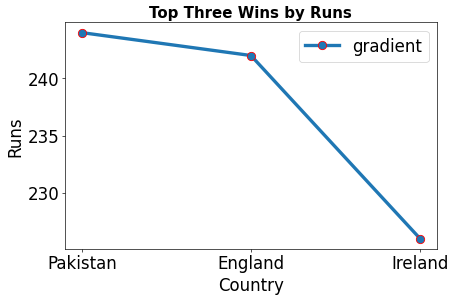

In [158]:
x = ["Pakistan", "England", "Ireland"]
y = run_wins['Runs']

plt.figure(figsize = (8,5), dpi = 60)
plt.plot(x,y, linewidth = 4, label = "gradient", marker = ".", markersize = 20, markeredgecolor = "red", linestyle = "-")

plt.title("Top Three Wins by Runs", fontdict = {"fontweight": "bold", 'fontsize': 18})
plt.xlabel("Country")
plt.ylabel("Runs")

plt.legend()
plt.show()

Top three wins by runs are by Pakistan, England and Ireland in respective order.

## How many matches were played every month?
## In which month most ODI's were played?

In [42]:
pd.DatetimeIndex(matchesData['Match Date']).month.value_counts()

3     26
1     23
9     14
2     13
10    13
7     12
8     10
6      6
11     6
12     3
Name: Match Date, dtype: int64

As you can see the result, in 3rd months that is March 26 ODI's were played. And above shows the month and the number of matches taken place in the month

## Did India win mostly by chasing or playing first?

In [43]:
india_wins = matchesData.loc[(matchesData.Winner == 'India')]
india_wins

,Team 1,Team 2,Winner,Margin,Ground,Match Date,Scorecard,Wickets,Runs
23,South Africa,India,India,6 wickets,Durban,2018-02-01,ODI # 3969,6 wickets,-1.0
24,South Africa,India,India,9 wickets,Centurion,2018-02-04,ODI # 3970,9 wickets,-1.0
25,South Africa,India,India,124 runs,Cape Town,2018-02-07,ODI # 3971,-1 wickets,124.0
30,South Africa,India,India,73 runs,Port Elizabeth,2018-02-13,ODI # 3976,-1 wickets,73.0
32,South Africa,India,India,8 wickets,Centurion,2018-02-16,ODI # 3978,8 wickets,-1.0
68,England,India,India,8 wickets,Nottingham,2018-07-12,ODI # 4014,8 wickets,-1.0
93,Hong Kong,India,India,26 runs,Dubai (DSC),2018-09-18,ODI # 4039,-1 wickets,26.0
94,India,Pakistan,India,8 wickets,Dubai (DSC),2018-09-19,ODI # 4040,8 wickets,-1.0
96,Bangladesh,India,India,7 wickets,Dubai (DSC),2018-09-21,ODI # 4042,7 wickets,-1.0
98,India,Pakistan,India,9 wickets,Dubai (DSC),2018-09-23,ODI # 4044,9 wickets,-1.0


India won by wickets means that they were chasing the score (played after) and winning by runs means india was playing first. 
This means that we have to consider the ratio of the matches won by wickets and runs. 

In [44]:
india_wins[india_wins.Runs > 0].shape[0]

4

In [45]:
india_wins[india_wins.Wickets != "-1 wickets"].shape[0]

10

As evident, India has won more matches by chasing than by playing first